<a href="https://colab.research.google.com/github/FritzZuhl/ml-design-patterns/blob/master/01_need_for_design_patterns/ml_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Challenges

This notebook includes various code snippets mentioned in the first chapter of our Machine Learning Design Patterns book.

In [1]:
import pandas as pd
import tensorflow as tf

from sklearn.utils import shuffle
from google.cloud import bigquery

### Repeatability

Because of the inherent randomness in ML, there are additional measures required to ensure repeatability and reproducability between training and evaluation runs.

In [2]:
# Setting a random seed in TensorFlow
# Do this before you run training to ensure reproducible evaluation metrics
# You can use whatever value you'd like for the seed
tf.random.set_seed(2)

You also need to consider randomness when preparing your training, test, and validation datasets. To ensure consistency, prepare a shuffled dataset before training by setting a random seed value.

First, let's look at an example without shuffling. We'll grab some data from the NOAA storms public dataset in BigQuery. You'll need a Google Cloud account to run the cells that use this dataset.

In [3]:
from google.colab import auth
auth.authenticate_user()

Replace `your-cloud-project` below with the name of your Google Cloud project.

In [9]:
%%bigquery storms_df --project api-project-354541448821
SELECT
  *
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
LIMIT 1000

Run the cell below multiple times, and notice that the order of the data changes each time.

In [10]:
storms_df = shuffle(storms_df)
storms_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
951,None,9995793,Georgia,13,thunderstorm wind,C,17,BEN HILL,None,1964-07-10 15:30:00,CST,1964-07-10 15:30:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
971,None,9995798,Georgia,13,thunderstorm wind,C,121,FULTON,None,1964-08-04 19:00:00,CST,1964-08-04 19:00:00,0,0,0,0,0,0,None,55.0,None,None,None,0,0,None,None,None,None,None,None,None,None
515,None,10121651,Texas,48,thunderstorm wind,C,337,MONTAGUE,None,1964-08-07 17:00:00,CST,1964-08-07 17:00:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
221,None,10012181,Iowa,19,thunderstorm wind,C,181,WARREN,None,1964-05-26 02:00:00,CST,1964-05-26 02:00:00,0,0,0,0,0,0,None,51.0,None,None,None,0,0,None,None,None,None,None,None,None,None
758,None,10028140,Kansas,20,thunderstorm wind,C,175,SEWARD,None,1964-09-14 18:50:00,CST,1964-09-14 18:50:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None


Next, repeat the above but set a random seed. Note that the data order stays the same even when run multiple times.



In [12]:
shuffled_df = shuffle(storms_df, random_state=2)
shuffled_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
394,None,10121670,Texas,48,tornado,C,249,JIM WELLS,None,1964-09-16 13:50:00,CST,1964-09-16 13:50:00,0,0,0,0,2500,0,None,0.0,None,None,F1,0.2,33,None,None,None,None,None,None,None,None
647,None,10025232,Kansas,20,tornado,C,27,CLAY,None,1964-04-20 19:35:00,CST,1964-04-20 19:35:00,0,0,0,0,25000,0,None,0.0,None,None,F2,12.4,50,None,None,None,None,None,None,None,None
285,None,10120559,Texas,48,hail,C,475,WARD,None,1964-05-27 19:50:00,CST,1964-05-27 19:50:00,0,0,0,0,0,0,None,2.0,None,None,None,0,0,None,None,None,None,None,None,None,None
183,None,10012224,Iowa,19,thunderstorm wind,C,55,DELAWARE,None,1964-07-03 05:00:00,CST,1964-07-03 05:00:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
850,None,9986467,Florida,12,hail,C,17,CITRUS,None,1964-05-02 18:34:00,CST,1964-05-02 18:34:00,0,0,0,0,0,0,None,1.5,None,None,None,0,0,None,None,None,None,None,None,None,None


### Data drift

It's important to analyze how data is changing over time to ensure your ML models are trained on accurate data. To demonstrate this, we'll use the same NOAA storms dataset as above with a slightly different query. 

Let's look at how the number of reported storms has increased over time.

In [13]:
%%bigquery storm_trends --project api-project-354541448821
SELECT
  SUBSTR(CAST(event_begin_time AS string), 1, 4) AS year,
  COUNT(*) AS num_storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
GROUP BY
  year
ORDER BY
  year ASC

In [ ]:
storm_trends.head()

,year,num_storms
0,1950,223
1,1951,269
2,1952,272
3,1953,492
4,1954,609


As seen below, training a model on data before 2000 to predict storms now would result in incorrect predictions.

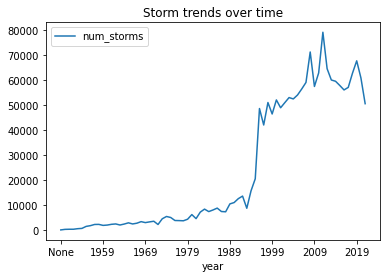

In [14]:
storm_trends.plot(title='Storm trends over time', x='year', y='num_storms')

Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License